## 3. Let's have a look at the NeXtSIM-DG outputs: 

In this notebook you will: 
* 3.1 Load python libraries,
* 3.2 Load the land/sea mask and initial conditions,
* 3.3 Plot land/sea mask and SST initial conditions,
* 3.4 Load and plot the  model outputs files.

---
## 3.1 Load python libraries

In [12]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import animation
from IPython.display import HTML

#JUPYTER notebook magics
%matplotlib inline 

---
## 3.2. Load the land/sea mask and initial conditions
from file : `init_25km_NH.nc`.

* Path where the model  files are:

In [2]:
dirwo = "/home/jovyan/work/"

* read the initial data:

In [3]:
datinit= xr.open_dataset(dirwo+'/init_25km_NH.nc',group='data')
datinit

<xarray.Dataset>
Dimensions:       (yvertex: 122, xvertex: 155, ncoords: 2, y: 121, x: 154, z: 3)
Dimensions without coordinates: yvertex, xvertex, ncoords, y, x, z
Data variables: (12/13)
    coords        (yvertex, xvertex, ncoords) float64 ...
    longitude     (y, x) float64 ...
    latitude      (y, x) float64 ...
    grid_azimuth  (y, x) float64 ...
    mask          (y, x) float64 ...
    cice          (y, x) float64 ...
    ...            ...
    hsnow         (y, x) float64 ...
    sss           (y, x) float64 ...
    sst           (y, x) float64 ...
    tice          (z, y, x) float64 ...
    u             (y, x) float64 ...
    v             (y, x) float64 ...

_Note:_ that the "group" option is necessary to read the files (netcdf4 format).

---
## 3.3 Plot land/sea mask and SST initial conditions

* Land sea mask:

<function matplotlib.pyplot.close(fig=None)>

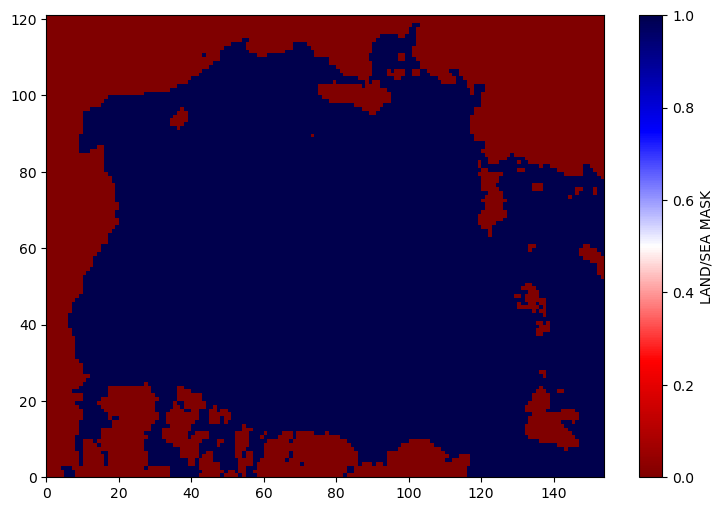

In [4]:
fig,(ax) = plt.subplots(1, 1, figsize=[9, 6],facecolor='w')
p = ax.pcolormesh(datinit.mask,cmap='seismic_r')
plt.colorbar(p,label='LAND/SEA MASK')
plt.show
plt.close

* plot SST in initial conditions

<function matplotlib.pyplot.close(fig=None)>

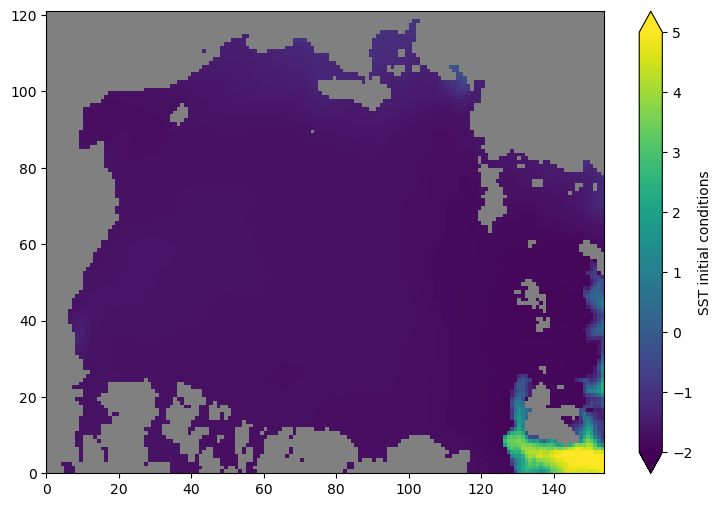

In [5]:
data2plt = datinit.sst
data2plt_masked = data2plt.where(datinit.mask!=0)

cmap = cm.viridis
cmap.set_bad('gray',1.)

fig,(ax) = plt.subplots(1, 1, figsize=[9, 6],facecolor='w')
p = ax.pcolormesh(data2plt_masked,cmap=cmap,vmin=-2,vmax=5,)
plt.colorbar(p,label='SST initial conditions',extend='both')
plt.show
plt.close

---
## 3.4 Load and plot the  model outputs files 


In [9]:
outputs= xr.open_dataset(dirwo+'/output_longsimudyn.nc',group='data')
outputs

<xarray.Dataset>
Dimensions:  (time: 30, y: 121, x: 154, z: 3)
Coordinates:
  * time     (time) float64 1.262e+09 1.262e+09 ... 1.265e+09 1.265e+09
Dimensions without coordinates: y, x, z
Data variables:
    cice     (time, y, x) float64 ...
    hice     (time, y, x) float64 ...
    hsnow    (time, y, x) float64 ...
    tice     (time, z, y, x) float64 ...

### 3.4.a Animate the evolution of the simulated sea ice concentration 

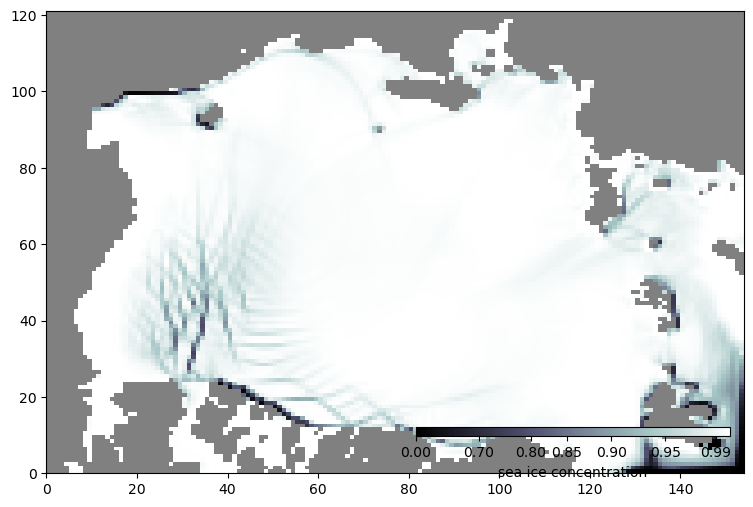

In [14]:
# Number of timesteps in the output file
NTIME = outputs.time.size

# select colormap and set gray color for missing values (i.e. for land)
cmap = cm.bone
cmap.set_bad('gray',1.)

norm = mcolors.PowerNorm(gamma=4.5,vmin=0, vmax=1)


# select sea ice concentration
data2plt = outputs.cice
# mask  land so that it appears gray
data2plt_masked = data2plt.where(datinit.mask!=0)


fig,(ax) = plt.subplots(1, 1, figsize=[9, 6],facecolor='w')
it=0
#p = ax.pcolormesh(data2plt_masked.isel(time=it),vmin=0,vmax=1,cmap=cmap)
p = ax.pcolormesh(data2plt_masked.isel(time=it),cmap=cmap,norm=norm)

#plt.colorbar(p,label='sea ice concentration',extend='both')

# colorbar
cblev=[0,0.7,0.8,0.85,0.9,0.95,0.99]
axins1 = inset_axes(ax,
                        height="10%",  # height : 5%
                            width="50%",
                        bbox_to_anchor=(0.08, -0.1,0.9,0.2),
                        bbox_transform=ax.transAxes,
                        borderpad=0)

cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=axins1, orientation='horizontal',ticks=cblev,label='sea ice concentration')



def animate(it):
    p.set_array(data2plt_masked.isel(time=it))
    p.set_label('test '+str(it))
    return p,

def init():
    p.set_array(data2plt_masked.isel(t=0))
    return p,

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=NTIME,
                              interval=1,
                              blit=True)

HTML(ani.to_jshtml())

### 3.4.b Animate the evolution of the simulated sea ice height 

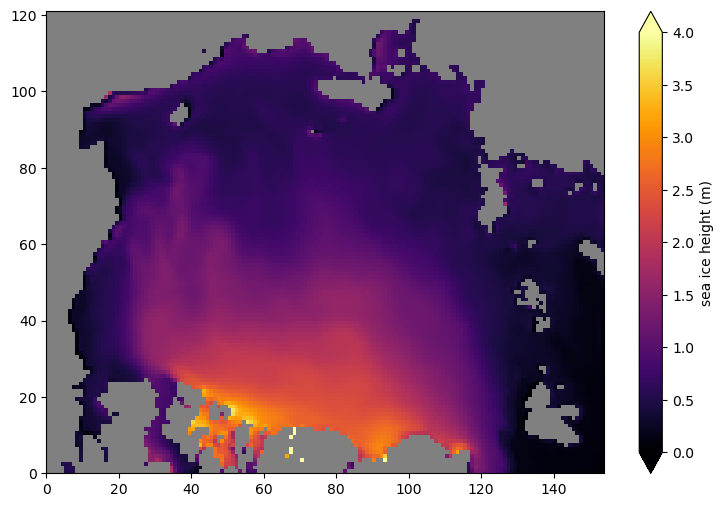

In [7]:
# Number of timesteps in the output file
NTIME = outputs.time.size

# select colormap and set gray color for missing values (i.e. for land)
cmap = cm.inferno
cmap.set_bad('gray',1.)

# select sea ice height
data2plt = outputs.hice
# mask  land so that it appears gray
data2plt_masked = data2plt.where(datinit.mask!=0)


fig,(ax) = plt.subplots(1, 1, figsize=[9, 6],facecolor='w')
it=0
p = ax.pcolormesh(data2plt_masked.isel(time=it),vmin=0,vmax=4,cmap=cmap)
plt.colorbar(p,label='sea ice height (m)',extend='both')


def animate(it):
    p.set_array(data2plt_masked.isel(time=it))
    p.set_label('test '+str(it))
    return p,

def init():
    p.set_array(data2plt_masked.isel(t=0))
    return p,

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=NTIME,
                              interval=1,
                              blit=True)

HTML(ani.to_jshtml())

---
## 3.5 What's next ?

--> You can design your own vizualization or explore the SASIP catalog to produce more beautiful pictures !!